# Heavy Traffic Indicators on I-94

In this projekt heavy traffic indicators for the Highway [Interstate 94](https://en.wikipedia.org/wiki/Interstate_94) shall be determined.
John Hogue made the dataset available and it can be downloaded from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume).
According to the dataset documentation a station located approximately midway between Minneapolis and Saint Paul recorded the traffic data.
Furthermore, the station only recorded westbound traffic (cars moving from east to west).
Consequently this analysis cannot generalize the entire traffic on this specific highway.

The goal of the analysis is to determine indicators of heavy traffic on I-94.

First, the libraries and the dataset are imported:

In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import matplotlib.pyplot as plt 
# necessary to  use matplotlib inside jupyter:
%matplotlib inline 

data = pd.read_csv('Metro_Interstate_Traffic_Volume.csv') 

The first and the last columns of the dataset are displayed to gain some basic understanding:

In [2]:
data.head()


,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [3]:
data.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


According to the description thedataset has the following attributes:

- **holiday**: Categorical US National holidays plus regional holiday, Minnesota State Fair 
- **temp**: Numeric Average temp in kelvin 
- **rain_1h**: Numeric Amount in mm of rain that occurred in the hour 
- **snow_1h**: Numeric Amount in mm of snow that occurred in the hour 
- **clouds_all**: Numeric Percentage of cloud cover 
- **weather_main**: Categorical Short textual description of the current weather 
- **weather_description**: Categorical Longer textual description of the current weather 
- **date_time**: DateTime Hour of the data collected in local CST time 
- **traffic_volume**: Numeric Hourly I-94 ATR 301 reported westbound traffic volume

Additional information about data types and non-null entries can be gathered by:

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


For as broad overview the traffic volume is plotted in a histogram :

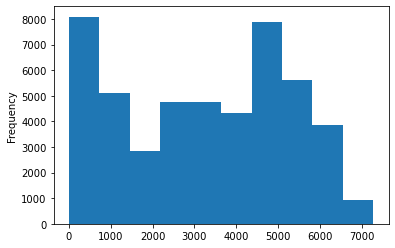

In [5]:
data['traffic_volume'].plot.hist()
plt.show()

Furthermore basic statistics about the `traffic_volume` data can be obtained by:

In [6]:
data['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

The traffic is unevenly distributed. 25% of ATR 301 westbound traffic is located under `1193` and 75% is located above `4933`. This suggests a strong separation in day and night time. To examine this assumption the daytime is defined to 7 a.m. - 7 p.m. and the night time to 7 p.m. - 7 a.m.. This is a very rough separation of night and day, but as it can be seen in the following, it will lead to significant results.

First the `date_time` column in the dataset is transformed to `pandas datetime objects`:

In [7]:
data['date_time'] = pd.to_datetime(data['date_time'])

Now the the dataset is separated by day and night time and the `traffic_volume` column is plotted individually :

In [8]:
data_day = data[(data['date_time'].dt.hour >= 7) & (data['date_time'].dt.hour <= 19)]
data_night = data[(data['date_time'].dt.hour < 7) | (data['date_time'].dt.hour > 19)]

<Figure size 432x288 with 0 Axes>

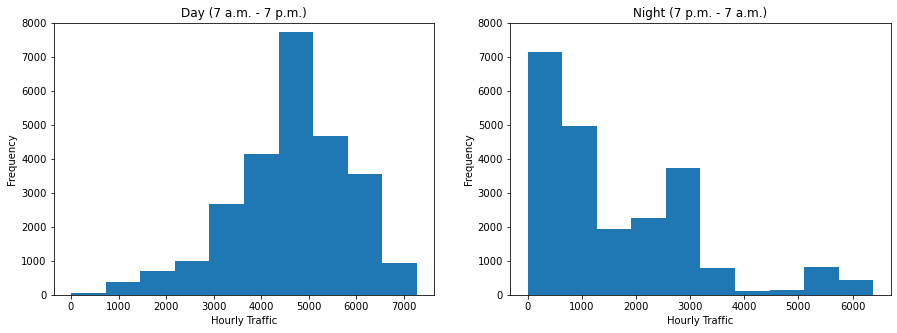

In [19]:
plt.figure()
plt.figure(figsize=(15, 5))

plt.subplot(1,2,1)
data_day['traffic_volume'].plot.hist()
plt.title('Day (7 a.m. - 7 p.m.)')
plt.ylim([0,8000])
plt.xlabel('Hourly Traffic')

plt.subplot(1,2,2)
data_night['traffic_volume'].plot.hist()
plt.title('Night (7 p.m. - 7 a.m.)')
plt.ylim([0,8000])
plt.xlabel('Hourly Traffic')

plt.show()

Again, basic statistical data can be obtained by the `datafrane.describe()` method:

In [10]:
data_day['traffic_volume'].describe()

count    25838.000000
mean      4649.292360
std       1202.321987
min          0.000000
25%       4021.000000
50%       4736.000000
75%       5458.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [11]:
data_night['traffic_volume'].describe()

count    22366.000000
mean      1654.648484
std       1425.175292
min          0.000000
25%        486.000000
50%       1056.500000
75%       2630.750000
max       6386.000000
Name: traffic_volume, dtype: float64

It can be observed that the day traffic is predominantly distributed evenly with a mean traffic of `4649`. The distribution of the traffic at night is right skewed with mainly very light traffic.

Since we are interested at indicator for heavy traffic, the night subset of the data can be neglected.

Now it should be analyzed if the traffic volume is affected by seasonal effects by creating a plot for the mean traffic for each month:

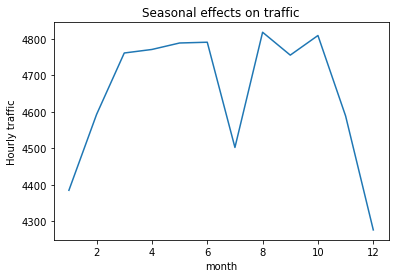

In [12]:
data_day['month'] = data_day['date_time'].dt.month
by_month = data_day.groupby('month').mean()

by_month['traffic_volume'].plot.line()
plt.title('Seasonal effects on traffic')
plt.ylabel('Hourly traffic')
plt.show()

It can be observed, that the traffic is very light during summer (july) and winter (december). This is probably because of holiday season where no working commute is necesssary. Generally the traffic is lighter during the cold months (November - February).

The same approach is now performed for the comparison by day:

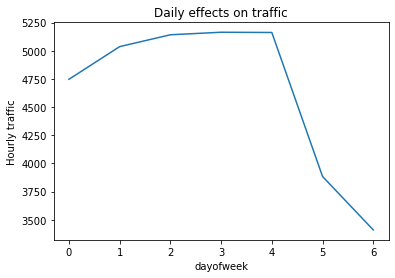

In [22]:
data_day['dayofweek'] = data_day['date_time'].dt.dayofweek
by_dayofweek = data_day.groupby('dayofweek').mean() 

by_dayofweek['traffic_volume'].plot.line() # 0 is Monday, 6 is Sunday
plt.title('Daily effects on traffic')
plt.ylabel('Hourly traffic')
plt.show()

The plot indicates, that traffic is lowest on saturday and sunday. This empowers the thesis above, that traffic is mainly affected by working commute. So in general business days lead to higher traffic.

Now the dataset is analyzed according to the time of the day. Therefore the weekends will be separated from the business days:

<Figure size 432x288 with 0 Axes>

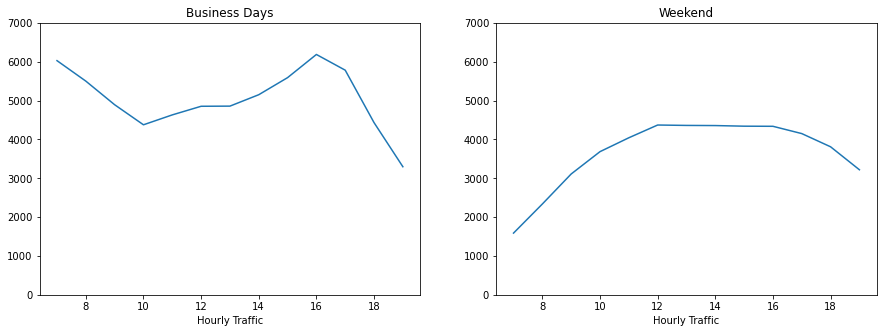

In [14]:
data_day['hour'] = data_day['date_time'].dt.hour
bussiness_days = data_day.copy()[data_day['dayofweek'] <= 4] # 4 == Friday
weekend = data_day.copy()[data_day['dayofweek'] >= 5] # 5 == Saturday
by_hour_business = bussiness_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

plt.figure()
plt.figure(figsize=(15, 5))

plt.subplot(1,2,1)
by_hour_business['traffic_volume'].plot.line()
plt.title('Business Days')
plt.ylim([0,7000])
plt.xlabel('Hourly Traffic')

plt.subplot(1,2,2)
by_hour_weekend['traffic_volume'].plot.line()
plt.title('Weekend')
plt.ylim([0,7000])
plt.xlabel('Hourly Traffic')

plt.show()

The data suggests, that during business days the traffic is highest during the commute in the rush hours (7a.m. and 4 p.m.) while during the weekend the traffic reaches a plateau during midday until evening.

---

Now the influence of the weather on the traffic volume should be examined. Therefore the correlation of the numerical values `temp`, `rain_1h`,`snow_1h` and `clouds_all` with `traffic_volume` is calculated:

In [15]:
data_day.corr()[['traffic_volume', 'temp', 'rain_1h', 'snow_1h', 'clouds_all']]

,traffic_volume,temp,rain_1h,snow_1h,clouds_all
temp,0.118084,1.000000,0.010418,-0.018720,-0.140432
rain_1h,0.004020,0.010418,1.000000,-0.000077,0.004881
snow_1h,0.003768,-0.018720,-0.000077,1.000000,0.026688
clouds_all,-0.033410,-0.140432,0.004881,0.026688,1.000000
traffic_volume,1.000000,0.118084,0.004020,0.003768,-0.033410
month,-0.017397,0.219847,0.001180,0.025776,-0.001401
dayofweek,-0.371023,-0.000273,-0.009378,-0.008464,-0.042392
hour,-0.007369,0.149594,0.006532,-0.000164,0.016667


The correlation is generally weak. However the strongest correlation is between the traffic volume exists and the temperature, which is demonstrated in the following plot:

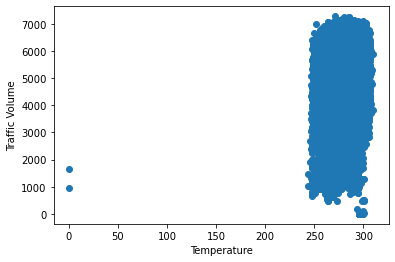

In [16]:
plt.scatter(data_day['temp'], data_day['traffic_volume'])
plt.ylabel('Traffic Volume')
plt.xlabel('Temperature')
plt.show()

The temperature is no reliable contribution to heavy traffic volume.

Plotting the traffic volume according to the `weather_main` column gives the following:

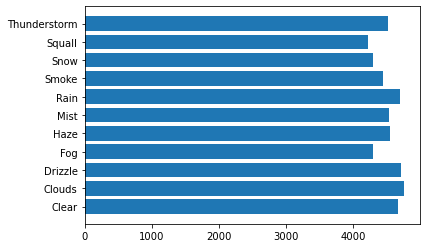

In [17]:
by_weather_main = data_day.groupby('weather_main').mean()
by_weather_description = data_day.groupby('weather_description').mean()

plt.barh(by_weather_main.index,by_weather_main['traffic_volume'])
plt.show()

There is no clear indication for traffic volume by `weather_main`, so now `weather_description` is examined:

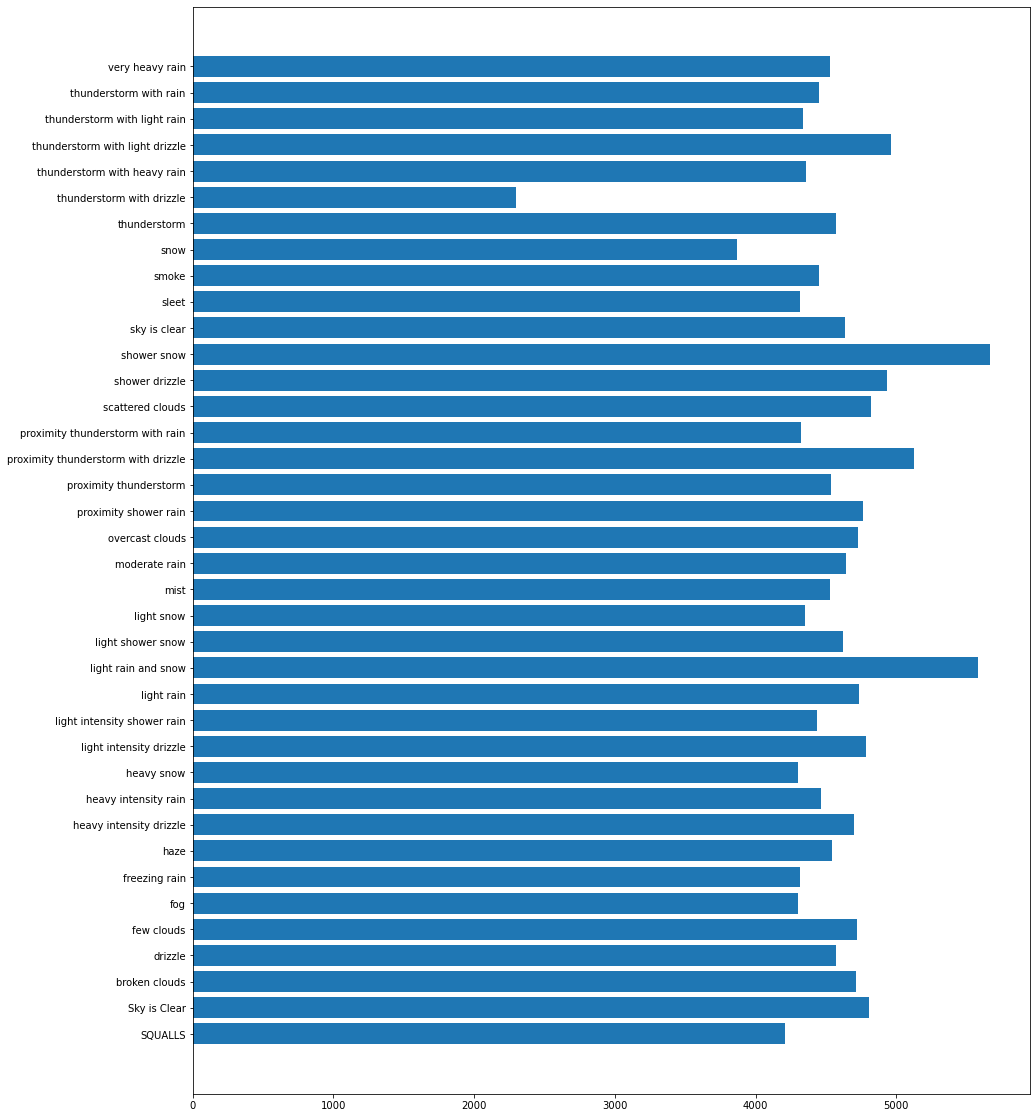

In [18]:
plt.figure(figsize=(15,20))
plt.barh(by_weather_description.index,by_weather_description['traffic_volume'])
plt.show()

The peaks are not very dominant. However, `shower snow` and `light rain and snow` can be identified as the main contributors to heavy traffic. It could be deduced, that this results from the beginning of the winter period , when cars are not well equipped (e.g. with winter tires).

---

# Summary

In this project, indicators for heavy traffic on the I-94 Interstate highway were researched. Mainly two types of indicators could be found:

**Time indicators**

- The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
- The traffic is usually heavier on business days compared to the weekends.
- On business days, the rush hours are around 7 a.m. and 4 p.m..

**Weather indicators**

- Shower snow
- Light rain and snow